# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

At this project we try to scrap the data of ethereum(a cryptocurrency) sales from Coin Gecko website. CoinGecko is a website which provides a fundamental analysis of the digital currency market. I will try to scrap this site for capstone project purpose only.

A lot of you might ask why we need to scrap this data from the sites while it already have a good enough visualisation. Let's say we have task to make a forecast on Indonesia's inflation rate. To do that we need to have the data, and scrapping is a good way to collect the data we don't have from public.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
soup

<!DOCTYPE html>

<html lang="en">
<head>
<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
<title>Ethereum USD Historical Data | CoinGecko</title>
<meta content="Get Ethereum (ETH) USD historical prices." name="description">
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dataLayer','GTM-NP34MX7

In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="applica


## Finding the right key to scrap the data & Extracting the right information

**Find the data**

In [5]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-02
  </th>
  <td class="text-center">
   $158,410,068,981
  </td>
  <td class="text-center">
   $5,052,407,841
  </td>
  <td class="text-center">
   $1,311.26
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-01
  </th>
  <td class="text-center">
   $160,462,955,554
  </td>
  <td class="text-center">
   $11,849,125,784
  </td>
  <td class="tex


**Finding row length**

In [6]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2022-10-02</th>,
 <th class="font-semibold text-center" scope="row">2022-10-01</th>,
 <th class="font-semibold text-center" scope="row">2022-09-30</th>,
 <th class="font-semibold text-center" scope="row">2022-09-29</th>,
 <th class="font-semibold text-center" scope="row">2022-09-28</th>]

In [7]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[0].text

'2022-10-02'

In [8]:
#first row

row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

31

In [9]:
table.find_all('td', attrs={'class':'text-center'})[:5]

[<td class="text-center">
 $158,410,068,981
 </td>,
 <td class="text-center">
 $5,052,407,841
 </td>,
 <td class="text-center">
 $1,311.26
 </td>,
 <td class="text-center">
 N/A
 </td>,
 <td class="text-center">
 $160,462,955,554
 </td>]

In [10]:
#second row

row2 = table.find_all('td', attrs={'class':'text-center'})
row_length2 = len(row2)
row_length2

124

**Below is the code for my scrapping process**

In [11]:
date = []
market_cap = []
volume = []
open = []
close = []

# get Date
for i in range(0, row_length):
    Date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    date.append(Date)

#get Market Cap    
for i in range(0, row_length2,4):
    Market_cap = table.find_all('td', attrs={'class':'text-center'})[i].text
    Market_cap = Market_cap.strip()
    market_cap.append(Market_cap)

#get Volume    
for i in range(1, row_length2,4):
    Volume = table.find_all('td', attrs={'class':'text-center'})[i].text
    Volume = Volume.strip()
    volume.append(Volume)

#get Open
for i in range(2, row_length2,4):
    opeen = table.find_all('td', attrs={'class':'text-center'})[i].text
    opeen = opeen.strip()
    open.append(opeen)

#get close
for i in range(3, row_length2,4):
    closee = table.find_all('td', attrs={'class':'text-center'})[i].text
    closee = closee.strip()
    close.append(closee)
   

In [12]:
volume

['$5,052,407,841',
 '$11,849,125,784',
 '$11,834,328,252',
 '$16,571,161,476',
 '$16,685,874,856',
 '$15,270,197,376',
 '$10,552,647,870',
 '$11,251,326,609',
 '$17,599,766,731',
 '$17,517,188,721',
 '$18,732,743,242',
 '$13,605,986,462',
 '$17,757,533,838',
 '$14,696,599,277',
 '$10,309,763,882',
 '$17,892,819,035',
 '$24,787,864,367',
 '$17,198,033,718',
 '$22,286,700,927',
 '$16,770,566,236',
 '$11,692,754,175',
 '$12,521,808,521',
 '$19,418,675,071',
 '$16,676,188,643',
 '$18,560,005,397',
 '$20,860,201,644',
 '$11,815,125,729',
 '$7,827,505,125',
 '$8,500,114,334',
 '$15,857,654,357',
 '$15,076,286,517']

**Making Columns**

In [14]:
table_2 = soup.find('div', attrs={'class':'card-block'})
print(table.prettify()[:500])

<tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-02
  </th>
  <td class="text-center">
   $158,410,068,981
  </td>
  <td class="text-center">
   $5,052,407,841
  </td>
  <td class="text-center">
   $1,311.26
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-01
  </th>
  <td class="text-center">
   $160,462,955,554
  </td>
  <td class="text-center">
   $11,849,125,784
  </td>
  <td class="tex


In [15]:
columns = [th.text for th in table_2.find('thead').find_all('th')]
columns

['Date', 'Market Cap', 'Volume', 'Open', 'Close']

## Creating data frame & Data wrangling

Put the array into dataframe

In [16]:
import pandas as pd

df = pd.DataFrame({
    columns[0]:date,
    columns[1]:market_cap,
    columns[2]:volume,
    columns[3]:open,
    columns[4]:close
})
df.head()

,Date,Market Cap,Volume,Open,Close
0,2022-10-02,"$158,410,068,981","$5,052,407,841","$1,311.26",N/A
1,2022-10-01,"$160,462,955,554","$11,849,125,784","$1,329.15","$1,311.26"
2,2022-09-30,"$161,267,455,734","$11,834,328,252","$1,335.74","$1,329.15"
3,2022-09-29,"$161,716,193,676","$16,571,161,476","$1,340.02","$1,335.74"
4,2022-09-28,"$160,800,122,125","$16,685,874,856","$1,331.15","$1,340.02"


In [17]:
df.dtypes

Date          object
Market Cap    object
Volume        object
Open          object
Close         object
dtype: object

**Data Cleaning (Replacing the comma)**

In [18]:
datevolume = df[['Date','Volume']]
datevolume.head(3)


,Date,Volume
0,2022-10-02,"$5,052,407,841"
1,2022-10-01,"$11,849,125,784"
2,2022-09-30,"$11,834,328,252"


In [19]:
def delete_dollar(x):
    for i in x:
        xx = i.split('$')
        return int(xx[1].replace(',',''))

In [20]:
datevolume['Volume'] = datevolume[['Volume']].apply(delete_dollar, axis=1) 

C:\Users\Triton 300\AppData\Local\Temp\ipykernel_16680\203391909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datevolume['Volume'] = datevolume[['Volume']].apply(delete_dollar, axis=1)


**Data visualisation With Matplotlyb and Seaborn**

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [23]:
volumedate = datevolume[::-1].set_index('Date')

<AxesSubplot:xlabel='Date'>

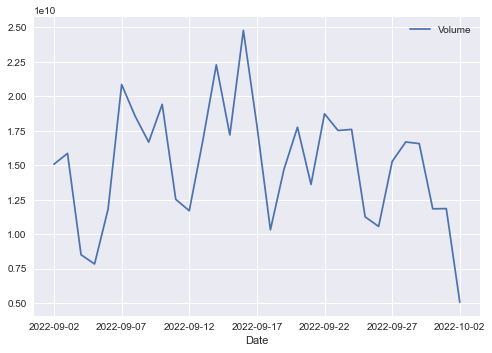

In [24]:
volumedate.plot()

In [ ]:
#improving my visualization with seaborn

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

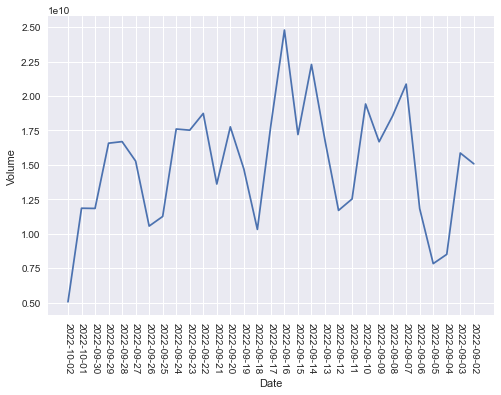

In [36]:
import seaborn as sns

sns.lineplot(data = datevolume, x="Date", y="Volume")
plt.xticks(rotation=270)



### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

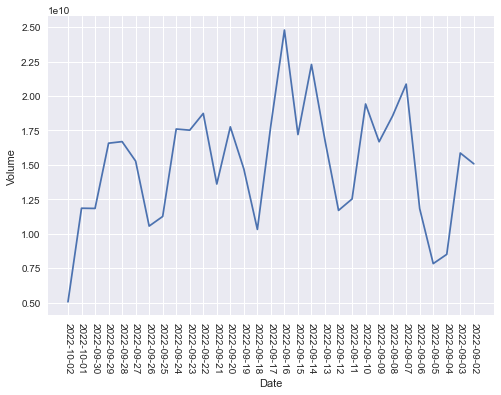

In [37]:
sns.lineplot(data = datevolume, x="Date", y="Volume")
plt.xticks(rotation=270)

**Conclusion**

Between September 2 and October 2 2022, the movement of the Ethereum volume is highly erratic, making the daily involvement in trading volume fairly significant. The lowest volume traded for the specified time period was 7.8 billion on September 5. On the other hand, on September 17th, trading volume reaches a record high of 24.7B. Additionally, the average traded volume stands at 15B.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.